# Exact diagonalization study of Heisenberg chain

This notebook contains breif notes and sample codes for solving Heisenberg chain using exact diagonalization method. It is for pedagogical purpose. The following text and codes are prepared by [Mr. Hongyu Lu（卢虹宇）](https://quantummc.xyz/members/hongyu-lu/) and [ZYM](https://quantummc.xyz/members/zi-yang-meng/).

##  Model

<font  face=Times color=darkblue size=3> The model hamiltonian is: $$H=J\sum_{<i,j>}\vec{S_i}\cdot \vec{S_j}=J\sum_{<i,j>}(\frac{1}{2}(S_i^+S_j^-+S_i^-S_j^+)+S_i^zS_j^z)$$ with the spin raising/lowering operators.<br><br> We consider $S=1/2$ 1-dimensional spin chain here.

## ED

<font  face=Times color=darkblue size=3>The basic idea is to construct the matrix of Hamiltonian and diagonalize it to get the eigenvalues and eigenvectors. <br><br> We choose the $S^z$ basis and use the bit representation. For example, for a N-spin chain, there are $2^N$ states and can be represented as: $$|0>=|\downarrow,\downarrow,...,\downarrow> (=00...0)$$ $$|1>=|\uparrow,\downarrow,...,\downarrow> (=00...1)$$ <br><br> To construct the matrix, we enumerate the states and $H_{ij}=<i|H|j>$. Please kind in mind that  that
* the pairs of spin raising/lowering opertors $S_i^+S_j^-$ can flip the spins thus providing the off-diagonal elements,
* while the $S_i^zS_j^z$ operators provide the diagonal elements.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### About String concatenation

In [ ]:
# To show the process
a='0001'
b='1111'
c='22222'

In [ ]:
print('a:',a)
print('b:',b)
print('c:',c)
print('bin(a):', bin(10))

a: 0001
b: 1111
c: 22222
bin(a): 0b1010


In [ ]:
print('concatenation:a+b+c:',a+b+c)

concatenation:a+b+c: 0001111122222


#### Code

In [ ]:
# set parameters
N=10
dimension=2**N
#spin chain with all spin-down
z='0'*N
# initialize hamiltonian
H=np.zeros((dimension,dimension))
z

'0000000000'

In [ ]:
# Matrix Construction
for a in range(dimension):
    state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain # make the length equal to N
    print(state_chain)
  # for PBC, we set i in range(N)
  # for OBC, we set i in range(N-1)
    for i in range(N):
        j=np.mod(i+1,N)
 #       print(state_chain)
        if state_chain[i]==state_chain[j]: # i=j only diagonal elements
            H[a,a]+=0.25
#            print('a:',a)
        else:                              # else, the raising/lowering operators also have contributions
            H[a,a]-=0.25
            # then exchange i,j
            element_i=state_chain[i]
            element_j=state_chain[j]
            #flip
            if j==0:
#here we are doing the concatenation of string (you can try other methods)
#                    print(state_chain)
                state_chain1=element_i+state_chain[1:N-1]+element_j
            else:
                state_chain1=state_chain[0:i]+element_j+element_i+state_chain[j+1:]
#            print(state_chain)
            b=int(state_chain1,2)
#            print('a:',a)
#            print('b:',b)
            H[a,b]+=0.5

0000000000
0000000001
0000000010
0000000011
0000000100
0000000101
0000000110
0000000111
0000001000
0000001001
0000001010
0000001011
0000001100
0000001101
0000001110
0000001111
0000010000
0000010001
0000010010
0000010011
0000010100
0000010101
0000010110
0000010111
0000011000
0000011001
0000011010
0000011011
0000011100
0000011101
0000011110
0000011111
0000100000
0000100001
0000100010
0000100011
0000100100
0000100101
0000100110
0000100111
0000101000
0000101001
0000101010
0000101011
0000101100
0000101101
0000101110
0000101111
0000110000
0000110001
0000110010
0000110011
0000110100
0000110101
0000110110
0000110111
0000111000
0000111001
0000111010
0000111011
0000111100
0000111101
0000111110
0000111111
0001000000
0001000001
0001000010
0001000011
0001000100
0001000101
0001000110
0001000111
0001001000
0001001001
0001001010
0001001011
0001001100
0001001101
0001001110
0001001111
0001010000
0001010001
0001010010
0001010011
0001010100
0001010101
0001010110
0001010111
0001011000
0001011001
0001011010

In [ ]:
H

array([[2.5, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 1.5, 0.5, ..., 0. , 0. , 0. ],
       [0. , 0.5, 1.5, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1.5, 0.5, 0. ],
       [0. , 0. , 0. , ..., 0.5, 1.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 2.5]])

In [ ]:
eig_value=np.real(np.linalg.eig(H)[0])# eigen_values
eig_vec=np.real(np.linalg.eig(H)[1])  # eigenstates

In [ ]:
# ground state energy
#min(eig_value)
# ground state wave function
idx_sorted1 = np.argsort(eig_value)
eig_value=eig_value[idx_sorted1]
eig_vec=eig_vec[:,idx_sorted1]
eig_value[0], eig_vec[:,0]

(-4.515446354492049,
 array([ 0.00000000e+00,  7.44221936e-18, -2.02441872e-16, ...,
        -7.80546643e-17,  8.20671850e-17,  0.00000000e+00]))

In [ ]:
energy_level=np.sort(eig_value)

Text(0.5, 1.0, 'Energy Level of Spin Chain')

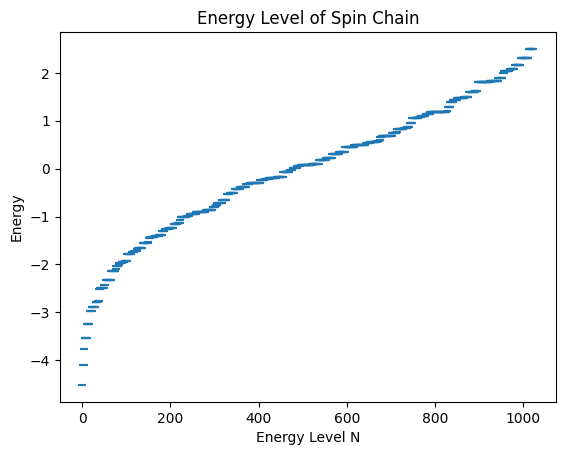

In [ ]:
plt.scatter(np.arange(0,len(energy_level)),energy_level,marker='_')
plt.xlabel('Energy Level N')
plt.ylabel('Energy')
#plt.ylim(-5,-4)
#plt.xlim(0,10)
plt.title('Energy Level of Spin Chain')

<font  face=Times color=darkblue size=3> Then we find the ground state by searching for the lowest energy.

#### Another way to flip spins

In [ ]:
# for a string '00001', if we flip the index 3 and 4
str_='00001'
# instead of concatenation, we can convert it to list first
site_3=str_[3]
site_4=str_[4]
list_=list(str_)
print(list_)
list_[3]=site_4
list_[4]=site_3
#convert it back to string
str_=''.join(list_)
str_

['0', '0', '0', '0', '1']


'00010'

therefore, to construct the Hamiltonian:

In [ ]:
# Matrix Construction
H=np.zeros((dimension,dimension))
for a in range(dimension):
    state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain # make the length equal to N
# for PBC, we set i in range(N)
# for OBC, we set i in range(N-1)
    for i in range(N):
        j=np.mod(i+1,N)
        if state_chain[i]==state_chain[j]: # i=j only diagonal elements
            H[a,a]+=0.25
        else:                              # else, the raising/lowering operators also have contributions
            H[a,a]-=0.25
            # then exchange i,j
            element_i=state_chain[i]
            element_j=state_chain[j]
            #flip
            chain1=list(state_chain)
            chain1[i]=element_j
            chain1[j]=element_i
            b=int(''.join(chain1),2)
            H[a,b]+=0.5

In [ ]:
eig_value=np.real(np.linalg.eig(H)[0])# eigen_values
eig_vec=np.real(np.linalg.eig(H)[1])  # eigenstates
# ground state wave function
idx_sorted1 = np.argsort(eig_value)
eig_value=eig_value[idx_sorted1]
eig_vec=eig_vec[:,idx_sorted1]
eig_value[0], eig_vec[:,0]

(-4.515446354492049,
 array([ 0.00000000e+00,  7.44221936e-18, -2.02441872e-16, ...,
        -7.80546643e-17,  8.20671850e-17,  0.00000000e+00]))

Text(0.5, 1.0, 'Energy Level of Spin Chain')

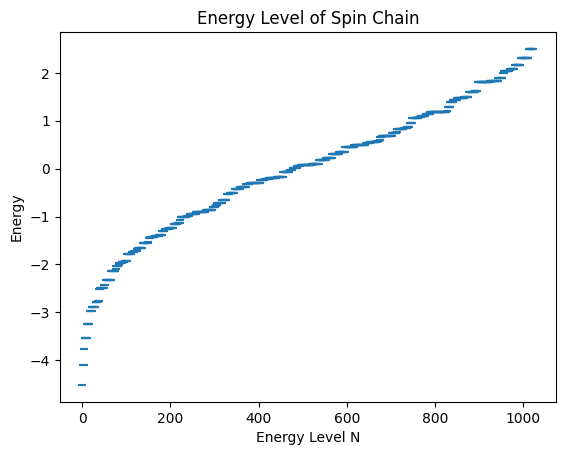

In [ ]:
energy_level=np.sort(eig_value)
plt.scatter(np.arange(0,len(energy_level)),energy_level,marker='_')
plt.xlabel('Energy Level N')
plt.ylabel('Energy')
plt.title('Energy Level of Spin Chain')

### measurement

<font  face=Times color=darkblue size=3> To measure observables, we take $S^z$ as an example. The expectation value of the n:th eigenstate is $$<n|S^z|n>=[U^{\dagger}S^zU]_{nn}$$ where U is the matrix whose columns are the eigenvectors. <br> To construct the matrix of the operator, the method is quite similar to that of hamiltonian, but there is only diagonal elements: $S^z_{aa}=+\frac{1}{2}n-\frac{1}{2}(N-n)$.

<font  face=Times color=darkblue size=3> We measure both the  $\langle S_z\rangle$ and $\langle S_{total}^2\rangle$, for the latter, we only have it for 2-site OBC problem.

In [ ]:
matrix_U=np.zeros((dimension,dimension)) #mat_U
matrix_Udag=np.zeros((dimension,dimension))
for i in range(dimension):
    matrix_U[:,i]=eig_vec[:,i].reshape(dimension)
    matrix_Udag[i,:]=np.conj(eig_vec[:,i].reshape(dimension))

In [ ]:
#tensor_form = np.reshape(eig_vec[:,0],(2,2,2))
#print('####0')
#print(tensor_form[0,:,:])
#print(tensor_form[1,:,:])
#tensor_form = np.reshape(eig_vec[:,1],(2,2,2))
#print('####1')
#print(tensor_form[0,:,:])
#print(tensor_form[1,:,:])
#tensor_form = np.reshape(eig_vec[:,2],(2,2,2))
#print('###2')
#print(tensor_form[0,:,:])
#print(tensor_form[1,:,:])
#tensor_form = np.reshape(eig_vec[:,3],(2,2,2))
#print('####3')
#print(tensor_form[0,:,:])
#print(tensor_form[1,:,:])

In [ ]:
# #def sz_tensor_form(ten):
# #  expectation = 0
#   for i in [0,1]:
#     for j in [0,1]:
#       for k in [0,1]:
#         expectation += ((-1)**i + (-1)**j + (-1)**k)*ten[i,j,k]**2/2
#   return expectation

In [ ]:
# tensor_form = np.reshape(eig_vec[:,1],(2,2,2))
# sz_tensor_form(tensor_form)

In [ ]:
mat_Sz=np.zeros((dimension,dimension))
mat_S2=np.zeros((dimension,dimension))

In [ ]:
##construct Sz matrix
for a in range(dimension):
    state_chain=bin(a)[2:] # the first two should be omitted for this 'bin' function
    l=len(state_chain)
    state_chain=z[0:N-l]+state_chain #make the length equal to N
    up_number=state_chain.count('1')
    down_number=N-up_number
    mat_Sz[a,a]=0.5*up_number-0.5*down_number

mat_S2=3*N/4*np.identity(dimension)+2*H              # this measurement is written for N=2 only

In [ ]:
mat_Sz

array([[-5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., -4.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., -4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  4.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  5.]])

In [ ]:
mat_S2

array([[12.5,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. , 10.5,  1. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  1. , 10.5, ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ..., 10.5,  1. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  1. , 10.5,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. , 12.5]])

In [ ]:
#mz_list=[]
#s2_list=[]
#for i in range(dimension):
#    mz_list.append(np.dot(np.dot(matrix_Udag,mat_Sz),matrix_U)[i,i])#measure
#    s2_list.append(np.dot(np.dot(matrix_Udag,mat_S2),matrix_U)[i,i])#measure s^2

mz_list = np.diag(np.dot(np.dot(matrix_Udag,mat_Sz),matrix_U))
s2_list = np.diag(np.dot(np.dot(matrix_Udag,mat_S2),matrix_U))
print(mz_list)
print(s2_list)

[-1.44201113e-29  1.00000000e+00 -1.00000000e+00 ... -2.73697478e+00
  4.00000000e+00 -1.07425371e+00]
[-1.53089271 -0.68441469 -0.68441469 ... 12.5        12.5
 12.5       ]


<font  face=Times color=darkblue size=3> The ground state is non-degenerate, while the 1st excited states are degenerate (for 2 site problem).

<font  face=Times color=darkblue size=3> Now, we see that for the antiferromagnet, the $S^z$ is generally equal to $0$ at ground state if N is even. And we can also see the $S_z$ at the triplet.
    <br><br> You can check the value of $S_z$ if N is odd.

### Renyi Entropy

We have learned from the classical statistics physics that the classical entrophy of a system has the form:
$$
S = \sum_i -p_i \ln p_i
$$

It is easily promoted to quantum case by utilizing the properies of density matrix. Since the eigenvalue of the density matrix is the probability of the occupation. In the eigenvector basis of the density matrix, we have the same definition as in classical case:
$$
S = \sum_i -p_i \ln p_i = -Tr(\rho\ln (\rho))
$$  

For a arbitrary state in Hilbert space $|\Psi\rangle$, The density matrix is $\rho = |\Psi\rangle \langle \Psi |$, given a set of basis $|i\rangle$. The state has the form$|\Psi\rangle = \sum_i a_i |i\rangle$ while the density matrix becomes $ = sum_{ij}|i\rangle \langle j |$



This is called von Neumann entropy or Shannon entropy. In some modern many body numerical techniques where the wave function is implicit thus we cannot directly calculate the Von Neumann entropy (Like in quantum Monte Carlo). However, in a generalized form of Von Neumann entropy which we called renyi entrophy defined as below.
$$S^{(n)}_A = \frac{1}{1-n} \ln (Tr (\rho_A^n))$$.
It can be analytically reduced to the Von Neumann Entanglement entropy when $n\to 1$,

$$S^{vN}_A=-Tr(\rho_A \ln \rho_A)$$

And also bear the feature that it can be evaluated in Monte Carlo method.

### Renyi Entropy measurement
We calculate the second order renyi enrophy below, where we plot the second order renyi enrophy as a function of subsystem size in a periodic chain with length 10.

The density matrix of the subsystem is getting by tracing out the contribution from the environment.

In [ ]:
def cal_renyi(psi,si,L,order):
  size1 = 2**(si)
  size2 = 2**(L-si)
  psi = psi.reshape((size1,size2))
  #reduced density matrix
  rho_r = psi@psi.T
  # print(rho_r)
  # print(np.linalg.eig(rho_r)[0])
  prob = np.linalg.eig(rho_r)[0]/np.trace(rho_r)
  renyi = (1/(1-order))*np.log(np.sum(prob**order))
  return renyi


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


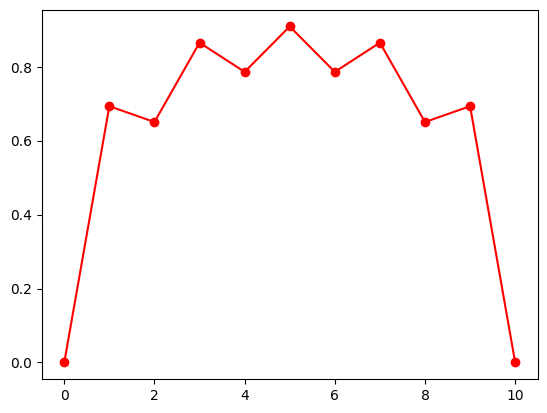

In [ ]:
gs = eig_vec[:,0]
na_list = np.arange(0,N+1)
EE_list = []
for i in range(len(na_list)):
  na_here = na_list[i]
  EE_here = cal_renyi(eig_vec[:,0],na_here,N,2)
  EE_list.append(EE_here)
plt.plot(na_list,EE_list,"ro-")

**We put the result for L = 64 Heisenberg chain we calculated from Monte Carlo calculation here for reference.**

Theorically, critical chains described by conformal field theory (CFT) display alogarithmic violation of the strict area law, as Renyi entropies grow with the subsystem length (A followingthe universal form

$$S_q(A) =\frac{c}{6}(1+\frac{1}{q})\ln(\frac{N}{\pi}\sin [\frac{\pi l_A}{N}])+s_q+\cdots $$

for periodic chains of length L, where c is the central charge of the CFT. The constant term s, is non-universal but can be evaluated exactly in some cases. By linear fittng of the variables $S^{(2)}_A$ and $\ln(\frac{N}{\pi}\sin [\frac{\pi l_A}{N}])$. We derive $\frac{c}{6}(1+\frac{1}{q}) = \frac{1}{4}$. We have $c = 1$ by CFT, thus $q = 2$ for Heisenberg chain.

The plots and the data are generated from Mr. [Menghan Song](https://quantummc.xyz/members/menghan-song/).

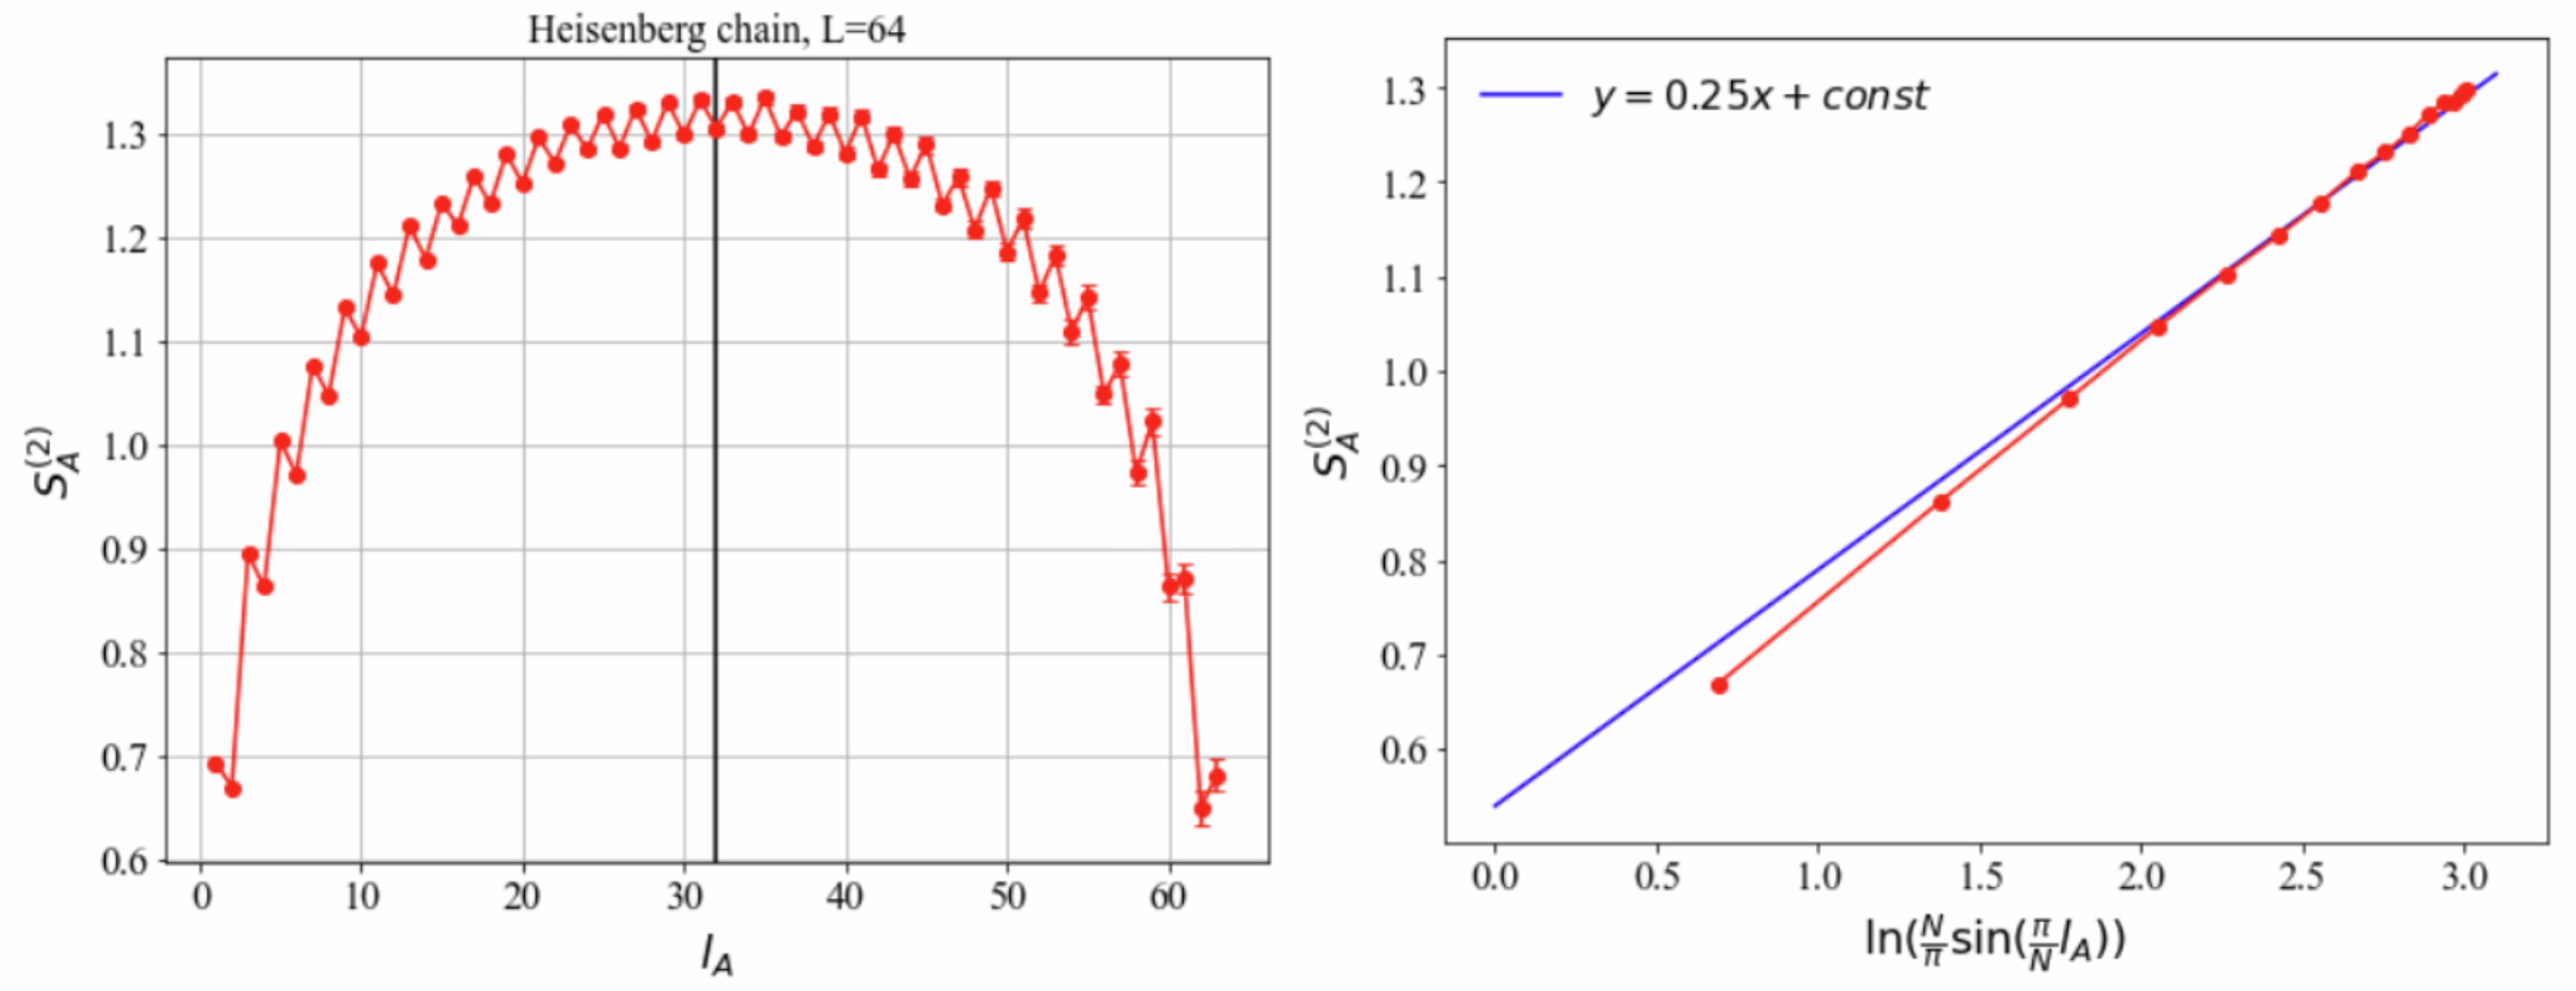